In [1]:
import gymnasium as gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting
matplotlib.style.use('ggplot')

C:\Users\ian\anaconda3\lib\site-packages\gymnasium\envs\registration.py:521: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\ian\anaconda3\lib\site-packages\gymnasium\envs\registration.py:521: UserWarning: WARN: Overriding environment GymV22Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [2]:
env = WindyGridworldEnv()


In [7]:
print(env.reset()) 
env.render() 
print(env.step(1)) 
env.render()
print(env.step(1)) 
env.render()
print(env.step(1)) 
env.render()
print(env.step(1)) 
env.render()
print(env.step(1)) 
env.render()
print(env.step(1)) 
env.render()

30
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(31, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(32, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(33, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(24, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o 

In [8]:
# 定義 ε-greedy策略
def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(observation):
        A = np.ones(nA, dtype = float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [14]:
def sarsa(env, num_episodes, discount_factor = 1.0, alpha = 0.5, epsilon = 0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    for i in range(num_episodes):
        if (i + 1) % 100 == 0:
            print(f"\r {(i + 1)}/{num_episodes}回合.", end="")
            sys.stdout.flush() 
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p = action_probs)
        
        for t in itertools.count():
            next_state, reward, done, _ = env.step(action)
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs))
                                           , p=next_action_probs)
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] = t
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            if done:
                break
            action = next_action
            state = next_state        
    
    return Q, stats

In [15]:
Q, stats = sarsa(env, 200)


 200/200回合.

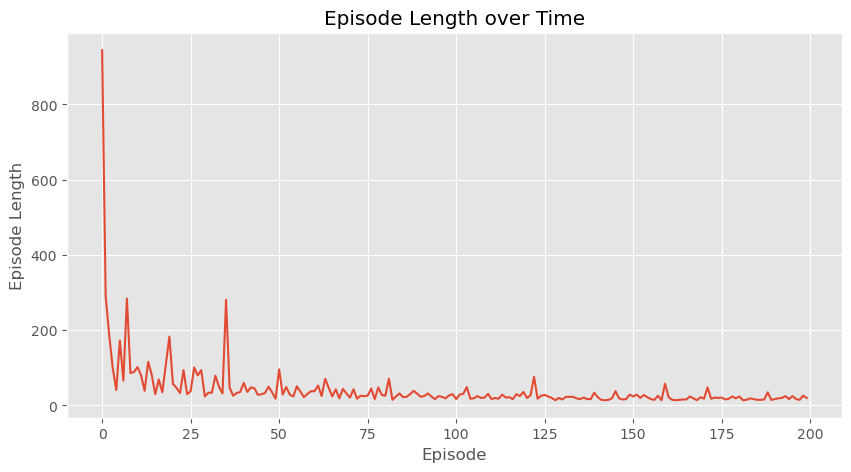

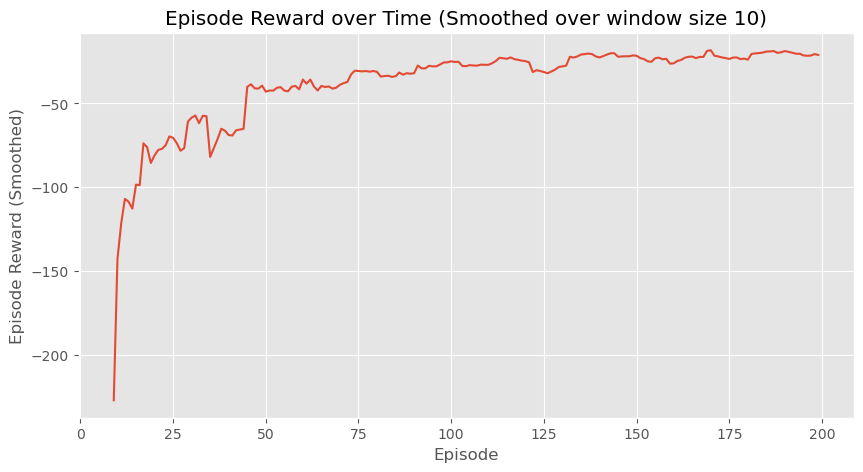

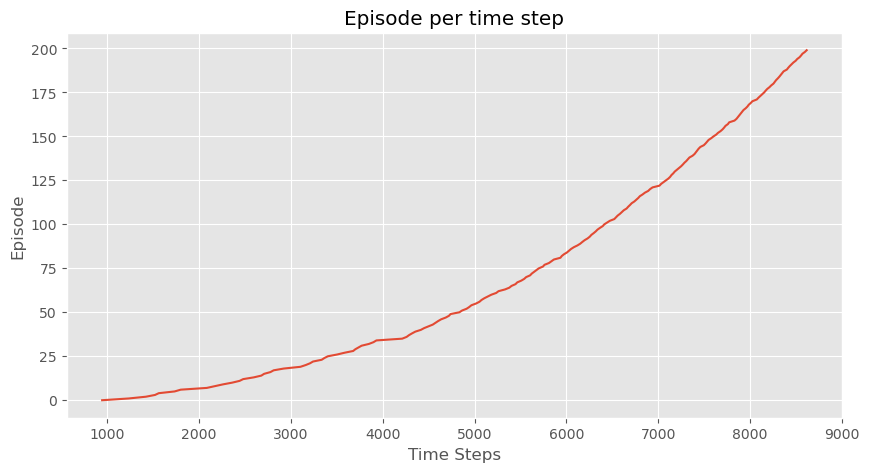

In [16]:
fig = plotting.plot_episode_stats(stats)
